<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024

# Ejercicio 1

## Datos

Considere el conjunto de datos “data1” del fichero data_exam1.xls

### Puntos

1. Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

2. Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind. ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [34]:
url = 'https://github.com/cam2149/MachinelearningI/raw/85795f6469ebde1f693b7cb6c893c10135408974/data_exam1.xlsx'

df=pd.read_excel(url, sheet_name='data1')

##Ejercicio 1_1

In [35]:
# @title Análisis explotatorio de datos
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [37]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


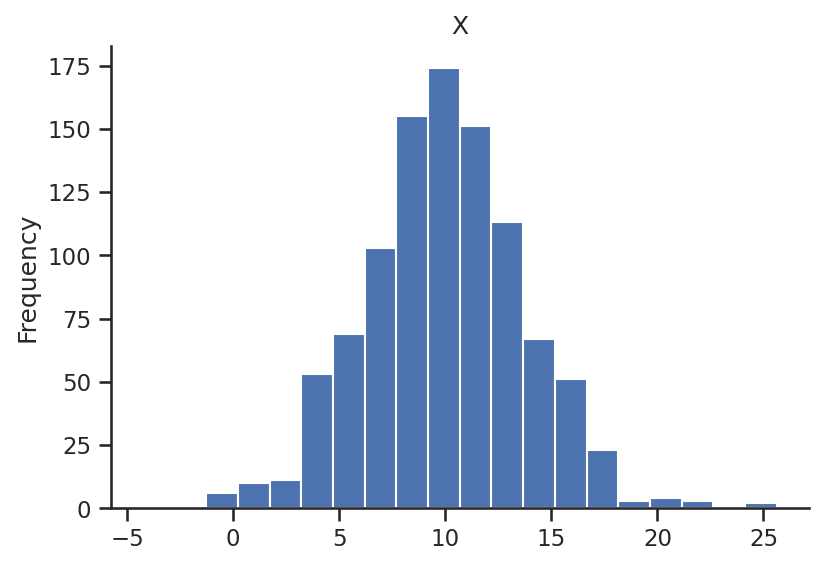

In [38]:
# @title X

from matplotlib import pyplot as plt
df['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

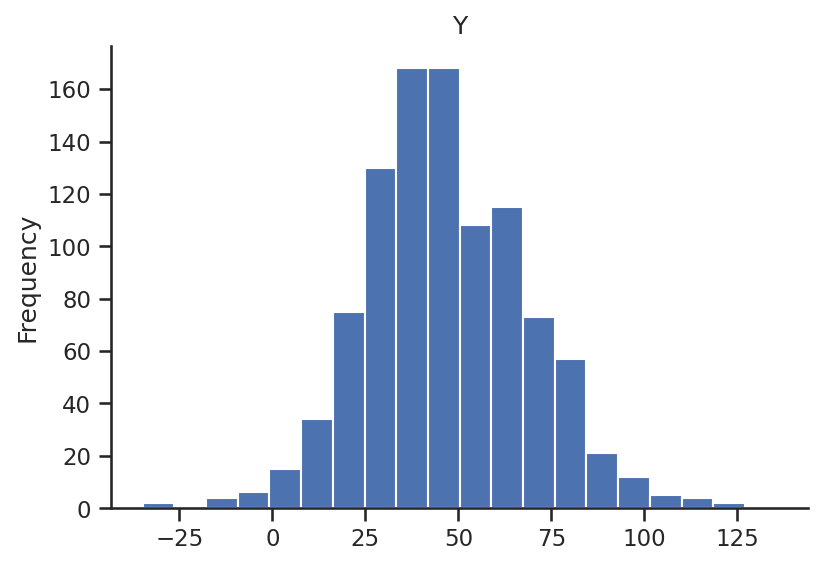

In [39]:
# @title Y

from matplotlib import pyplot as plt
df['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

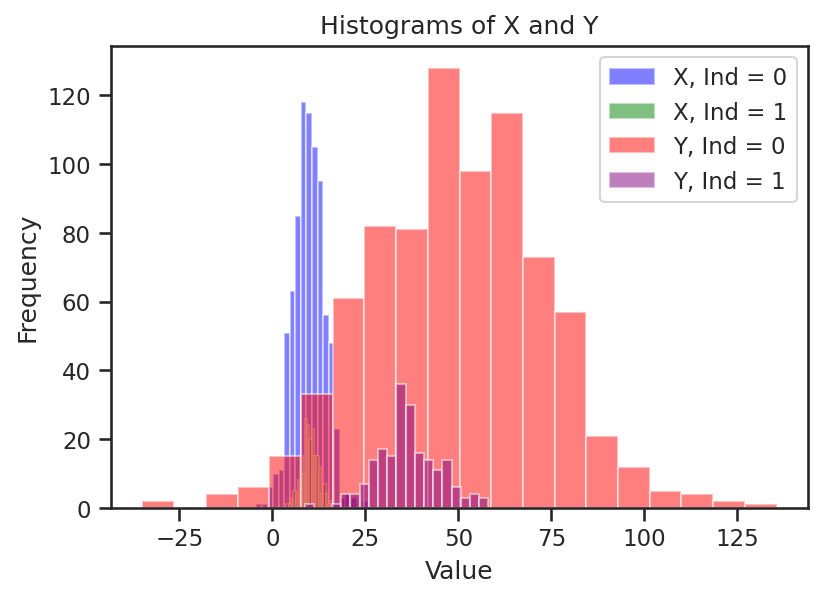

In [40]:
# @title Histograms of X and Y

import matplotlib.pyplot as plt


plt.hist(df[df['Ind'] == 0]['X'], bins=20, alpha=0.5, label='X, Ind = 0', color='blue')
plt.hist(df[df['Ind'] == 1]['X'], bins=20, alpha=0.5, label='X, Ind = 1', color='green')
plt.hist(df[df['Ind'] == 0]['Y'], bins=20, alpha=0.5, label='Y, Ind = 0', color='red')
plt.hist(df[df['Ind'] == 1]['Y'], bins=20, alpha=0.5, label='Y, Ind = 1', color='purple')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and Y')
_ = plt.legend()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


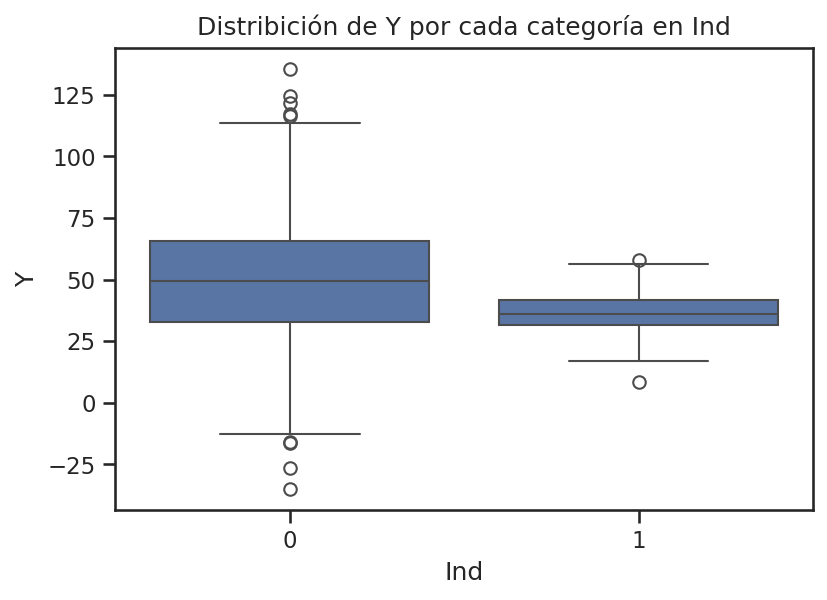

In [41]:
# @title Distribución de 'Y' por cada categoría de Ind
sns.boxplot(x='Ind', y='Y', data=df)
plt.title('Distribición de Y por cada categoría en Ind')
plt.show()

El diagrama de caja indica que la distribución de Y podría ser diferente para cada categoría de Ind.

In [42]:
# @title Matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)


            Y         X       Ind
Y    1.000000  0.832057 -0.237224
X    0.832057  1.000000  0.024069
Ind -0.237224  0.024069  1.000000


Text(0, 0.5, 'Y')

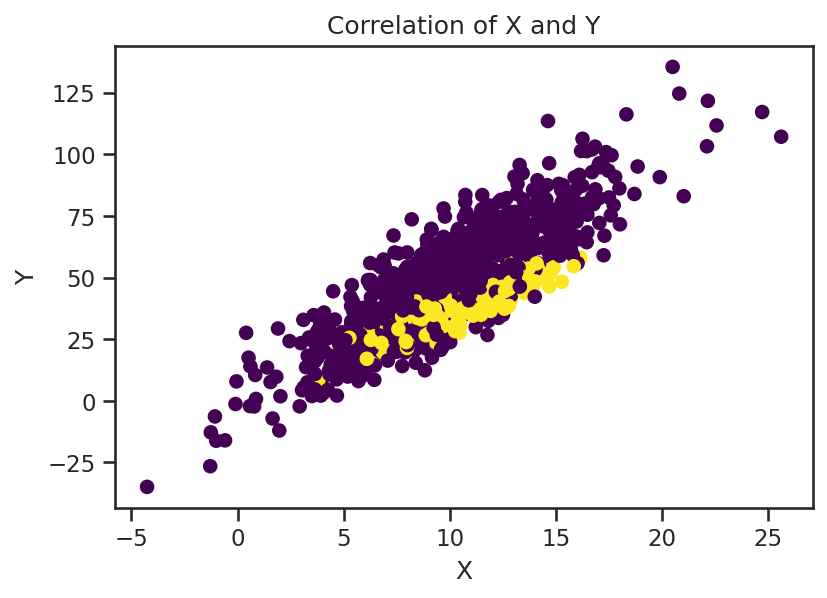

In [43]:
# @title Correlación entre 'X' y 'Y'

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(df['X'], df['Y'], c=df['Ind'], cmap='viridis')
plt.title('Correlation of X and Y')
plt.xlabel('X')
plt.ylabel('Y')



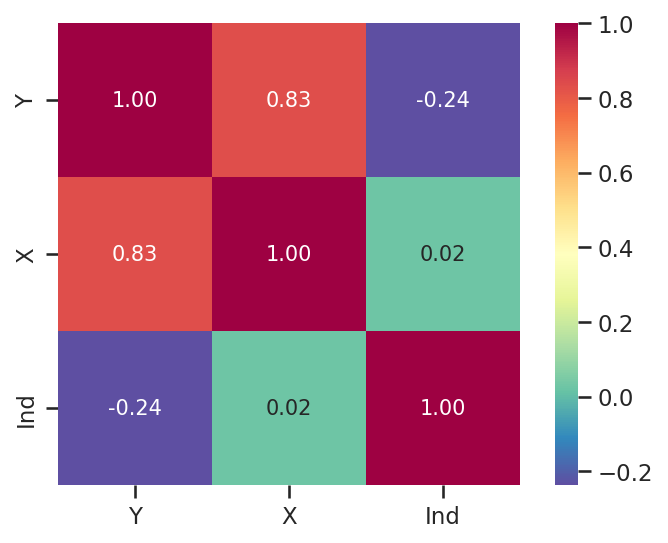

In [44]:
# Correlacion entre variables
numeric_df = df.select_dtypes(include=['number'])
corrmat = numeric_df.corr()

hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_df.columns,
                 xticklabels=numeric_df.columns,
                 cmap="Spectral_r")
plt.show()

La matriz de correlación muestra la correlación entre X e Y y las correlaciones entre las variables y la variable dependiente Y.

In [45]:
# @title Estadistica Descriptiva del Dataframe
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


### En respuesta a la pregunta **¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y?**
* **Sí**, Basado en el análisis exploratorio de datos, el diagrama de dispersión muestra una posible dependiencia entre X e Y, se identifica una dependencia de tipo relacion directa (directamente proporcional).
* Se evidencia cierta correlación entre X e Y y sin interacción de la variable categorica Ind, lo que parece posible construir un modelo de regresión.

In [46]:
# @title Modelo de regresión sin interacción e interpretelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Preparing the data
X = df[['X']]
y = df[['Y']]
# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Calcular el índice para seleccionar el 80% de los datos.
X_train = df[['X']][:train_size]
Y_train = df[['Y']][:train_size]
x_test = df[['X']][train_size:]
y_test = df[['Y']][train_size:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 1)
Y_train shape: (800, 1)
x_test shape: (200, 1)
y_test shape: (200, 1)


In [47]:
#Entrenamiento del Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
regressorModel = LinearRegression()
# Ajuste los datos de entrenamiento a nuestro modelo.
regressorModel_interaction = regressorModel.fit(X_train, Y_train)

**Evaliación del modelo**

In [48]:
#Comprobar la puntuación de predicción
regressorModel.score(x_test, y_test)

0.6976206152814786

In [49]:
# Predicción de los valores de y
y_pred=regressorModel.predict(x_test)

# Creación de un dataframe con valores reales y previstos de y
evaluateModel = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluateModel

,Actual,Predicted
0,5.451543,13.894908
1,79.103886,77.278821
2,17.518589,1.336418
3,34.700521,40.941575
4,51.630719,44.360636
...,...,...
195,54.191565,31.543290
196,37.481140,43.760721
197,26.864547,44.215600
198,100.950444,82.779137


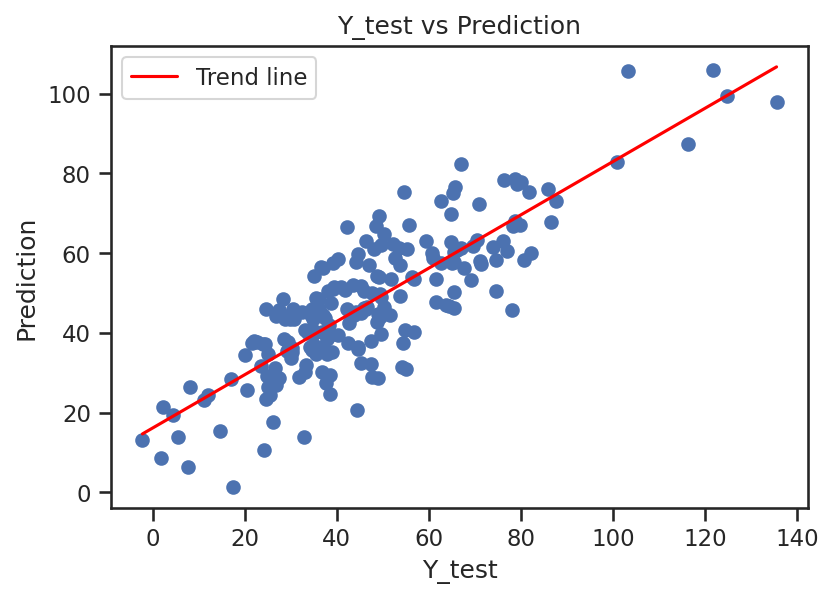

In [50]:
import scipy.stats as stats # Import the stats module from scipy
prediction = regressorModel.predict(x_test)
# Calcular la recta de regresión lineal.
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test.values.flatten(), prediction.flatten())

# Crea la línea de mejor ajuste
x_trend = np.linspace(min(y_test.values.flatten()), max(y_test.values.flatten()), 100)
y_trend = slope * x_trend + intercept

plt.plot(x_trend, y_trend, color='red', label='Trend line')
plt.xlabel('Y_test')
plt.ylabel('Prediction')
plt.title('Y_test vs Prediction')
plt.scatter(y_test, prediction)
plt.legend()
plt.show()

In [51]:
# Puntuación del modelo
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# R2 Score
r2score = r2_score(y_test, y_pred)
print(f"R2 score: {r2score}")
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae}")
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE score: {rmse}")
mse = mean_squared_error(y_test, y_pred)
# Mean Squared Error (MSE)
print(f"MSE score: {mse}")

columnas = ['MAE', 'MSE', 'RMSE', 'R2']
resultados = pd.DataFrame()
resultados = pd.DataFrame({' ': columnas, 'Resultados': [mae, mse, rmse, r2score]});resultados


R2 score: 0.6976206152814786
MAE score: 10.03185390463401
RMSE score: 12.285985796273188
MSE score: 150.94544698622653


,,Resultados
0,MAE,10.031854
1,MSE,150.945447
2,RMSE,12.285986
3,R2,0.697621


In [52]:
import statsmodels.api as sm
# Agregar una constante al modelo para incluir la intersección
x_test_with_constant = sm.add_constant(x_test)
# Ajustar el modelo de regresión lineal
model = sm.OLS(y_test, x_test_with_constant).fit()
# Imprimir el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     460.7
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.42e-53
Time:                        05:20:02   Log-Likelihood:                -784.89
No. Observations:                 200   AIC:                             1574.
Df Residuals:                     198   BIC:                             1580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3878      0.871     53.229      0.0

In [53]:
import statsmodels.api as sm # Import statsmodels.api
import scipy.stats as stats
import numpy as np

residualsTest  = y_test - y_pred


In [54]:
#@title Validación de los supuestos teoricos de los modelos

# One-sample-t-test
t_statistic, p_value = stats.ttest_1samp(residualsTest, 0)
print("One-sample t-test para la esperanza de los errores:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")
if p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("**No se rechaza** la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

#Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling
# Prueba de Shapiro-Wilks
shapiro_statistic, shapiro_p_value = stats.shapiro(residualsTest)
print("\nPrueba de Shapiro-Wilks para la normalidad de los errores:")
print(f"Estadístico de Shapiro-Wilks: {shapiro_statistic}")
print(f"Valor p: {shapiro_p_value}")
if shapiro_p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residualsTest, 'norm')
print("\nPrueba de Kolmogorov-Smirnov para la normalidad de los errores:")
print(f"Estadístico de Kolmogorov-Smirnov: {ks_statistic}")
print(f"Valor p: {ks_p_value}")
if ks_p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Anderson-Darling
anderson_result = stats.anderson(residualsTest.values, dist='norm')
print("\nPrueba de Anderson-Darling para la normalidad de los errores:")
print(f"Estadístico de Anderson-Darling: {anderson_result.statistic}")
print(f"Valores críticos: {anderson_result.critical_values}")
print(f"Niveles de significancia: {anderson_result.significance_level}")

# Verificar si el estadístico de prueba es menor que el valor crítico correspondiente
# al nivel de significancia deseado.
significance_level = 0.05  # Nivel de significancia del 5%
critical_value_index = np.where(np.isclose(anderson_result.significance_level, significance_level))[0]
if critical_value_index.size > 0:
  critical_value = anderson_result.critical_values[critical_value_index[0]]
  if anderson_result.statistic < critical_value:
    print("Los residuos siguen una distribución normal.")
  else:
    print("Los residuos no siguen una distribución normal.")
else:
  print("No se encontró un valor crítico para el nivel de significancia deseado.")


# Prueba de Durbin-Watson (DW test).
DW = sm.stats.stattools.durbin_watson(residualsTest)
print(f'Prueba de Durbin-Watson para la independencia de los errores')
print(f'Estadístico DW: {DW}')
if DW < 1:
  print("Hay autocorrelación positiva.")
elif DW > 3:
  print("Hay autocorrelación negativa.")
else:
  print("No hay autocorrelación.")

print(f"======================================================================")

print(f"Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan")
breakpoint = 0
name = 'modelo'
test = sm.stats.diagnostic.het_breuschpagan(residualsTest, sm.add_constant(x_test), robust = False)
labels = ['Estadístico LM', 'Valor p', 'Estadístico F', 'Valor p F']
print(f"\nTest de Breusch-Pagan para la homocedasticidad de los errores:")
for i in range(len(test)):
  print(f'{labels[i]}: {test[i]}')

if test[1] < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

One-sample t-test para la esperanza de los errores:
Estadístico t: [-0.52429744]
Valor p: [0.60065517]
El valor p es mayor o igual a 0.05
**No se rechaza** la hipótesis nula de que la media de los residuos es cero.

Prueba de Shapiro-Wilks para la normalidad de los errores:
Estadístico de Shapiro-Wilks: 0.9775157522800914
Valor p: 0.0026796120237310857
El valor p es menor que 0.05
Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.

Prueba de Kolmogorov-Smirnov para la normalidad de los errores:
Estadístico de Kolmogorov-Smirnov: [0.45398664]
Valor p: [3.55541194e-38]
El valor p es menor que 0.05
Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.

Prueba de Anderson-Darling para la normalidad de los errores:
Estadístico de Anderson-Darling: [-198.00064303 -194.00192909 -190.00321515 -186.00450121 -182.00578727
 -178.00707333 -174.00835939 -170.00964545 -166.0109315

# Conclusiones

1. El modelo explica una parte de la variabilidad en la variable dependiente Y.
2. La variable X tiene un efecto significativo sobre Y, siendo la pendiente positiva, evidenciado en los graficos de dispersión.
3. La variable Ind, como variable categórica, también impacta en Y, aunque el efecto puede variar según la categoría de Ind como se evidencia en el grafico Distribución de 'Y' por cada categoría de Ind.
4.  La intersección del modelo representa el valor esperado de Y cuando tanto X como Ind son cero.

##Ejercicio 1_2

###Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind.

*  ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a
incrementos unitarios de X?
*  ¿Considera que un modelo con interacciones sería más adecuado?

 Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

<Figure size 1500x1200 with 0 Axes>

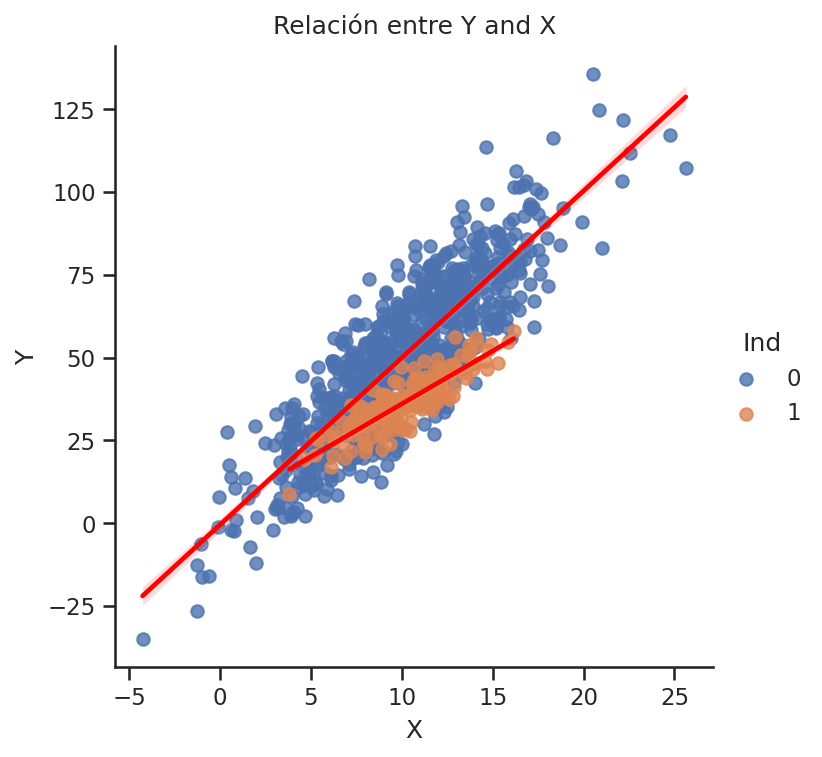

In [55]:
# @title Dispersión Y vs X
from matplotlib import pyplot as plt
# Analyze the relationship between Y and X
plt.figure(figsize=(10, 8))
sns.lmplot(x='X', y='Y', hue='Ind', data=df, line_kws={'color': 'red'})
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relación entre Y and X')
plt.show()



'Y ~ X + C(Ind) + X:C(Ind)'
Esta fórmula define un modelo de regresión lineal donde:
* Y es la variable dependiente (la que queremos predecir).
* X es una variable independiente numérica (explicativa).
* C(Ind) representa una variable independiente categórica llamada 'Ind', y su interacción.



In [56]:
# @title Modelo de regresión lineal con interacción entre X e Ind
# Modelo de regresión lineal con interacción entre X e Ind
import scipy.stats as stats # Import the stats module from scipy
# Import statsmodels.formula.api to access the ols function
import statsmodels.formula.api as smf
model_interaction = smf.ols('Y ~ X + C(Ind) + X:C(Ind)', data=df).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.34e-312
Time:                        05:20:03   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4991      1.001     -0.498

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Con 'Ind' como variable categórica y 'Y' es la variable target
X = df.drop('Y', axis=1)
y = df['Y']

# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Calcular el índice para seleccionar el 80% de los datos para entrenamiento.
X_train = df[['X']][:train_size]
Y_train = df[['Y']][:train_size]
x_test = df[['X']][train_size:]
y_test = df[['Y']][train_size:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
# Dividir los datos en entrenamiento y prueba
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train shape: (800, 1)
Y_train shape: (800, 1)
x_test shape: (200, 1)
y_test shape: (200, 1)


In [58]:
# @title Puntuación del modelo
print(f"======================================================================")
print(f"========= Evaluación el modelo sin interaciones con [Ind] ============")
print(f"======================================================================")

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# Crear un transformador para codificar la variable categórica
categorical_features = ['Ind']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Crear un pipeline que incluya el transformador y el modelo de regresión lineal
pipeline = Pipeline([
    ('transformer', transformer),
    ('regression', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, Y_train)

# Realizar predicciones
y_pred = pipeline.predict(x_test)
y_predTrain = pipeline.predict(X_train)

# Puntuación del modelo
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred)
print(f"R2 score: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE score: {rmse}")
mse = mean_squared_error(y_test, y_pred)
# Mean Squared Error (MSE)
print(f"MSE score: {mse}")

print(f"======================================================================")
print(f"========= Evaluación el modelo con interaciones con [Ind] ============")
print(f"======================================================================")


# Para incluir interacciones, puedes usar PolynomialFeatures de scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# Crear un pipeline que incluya el transformador, las interacciones y el modelo de regresión lineal
pipeline_with_interactions = Pipeline([
    ('transformer', transformer),
    ('interactions', PolynomialFeatures(interaction_only=True)),
    ('regression', LinearRegression())
])

# Entrenar el modelo con interacciones
pipeline_with_interactions.fit(X_train, Y_train)

# Realizar predicciones con interacciones
y_pred_with_interactions = pipeline_with_interactions.predict(x_test)

# Evaluar el modelo con interacciones
mse = mean_squared_error(y_test, y_pred_with_interactions)
print(f'Mean Squared Error con interacciones: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred_with_interactions)
print(f"R2 score con interacciones: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_with_interactions)
print(f"MAE Absolute error con interacciones: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_with_interactions))
print(f"RMSE Mean Squared Error: {rmse}")

mse = mean_squared_error(y_test, y_pred_with_interactions)
# Mean Squared Error (MSE)
print(f"MSE Mean Squared Error: {mse}")

========= Evaluación el modelo sin interaciones con [Ind] ============
Mean Squared Error: 129.50949127196836
R2 score: 0.7237370033244928
MAE score: 9.19434730897589
RMSE score: 11.380223691648963
MSE score: 129.50949127196836
========= Evaluación el modelo con interaciones con [Ind] ============
Mean Squared Error con interacciones: 126.31605683387939
R2 score con interacciones: 0.7305490736900582
MAE Absolute error con interacciones: 8.938197133977631
RMSE Mean Squared Error: 11.23904163324789
MSE Mean Squared Error: 126.31605683387939



**¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X?**

En repuesta a la pregunta anterior podemos decir que **si** hay evidencia muestral que sugiera un cambio de tasa de media de cambio de Y condicionado a incrementos unitarios de X:

*   El gráfico de dispersión Y vs X, con colores diferentes para cada valor la variable categórica 'Ind', nos permite visualizar la relación entre estas variables para cada población muestral definido por la categórica 'Ind', es notable al ver dos patrones de dispersión dependientes de la variable Ind y ***con pendientes diferentes***
* En lo que corresponde al cambio en la tasa media para un mismo incremento unitario de X, el incremento en Y no es el mismo para el patron de dispersión dependientes de la variable 'Ind' igual 0 que para el patron de dispersión dependientes de la variable 'Ind' = 1, es decir que el efecto de X sobre Y depende del valor de 'Ind'

**¿Considera que un modelo con interacciones sería más adecuado?**

* ***Sí***, considerando la evidencia muestral observada en el gráfico de dispersión, un modelo con interacciones entre X e Ind sería más acertado para modelar la variable Y
* Un modelo de regresión lineal sin interacción de la categorica 'Ind' se interpreta que el impacto de X sobre Y es constante e independiente de la variable 'Ind' lo que no es evidenciado en el gráfico de dispersión. Por otro lado un modelo con interacción evidendiaria el impacto de la variable X sobre Y segun la interacción con la categorica 'Ind'.

* Lo anterior indica que la variable 'Ind' influye en la relación entre Y y X, lo que nos permitiria generar un modelo para predecir Y utilizando X e Ind.



###Validación de los supuestos teoricos de los modelos##

* Esperanza de los errores es cero --- One-sample-t-test
  * Si el valor p es menor que 0.05, se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.
  * Si el valor p es mayor que 0.05, no se rechaza la hipótesis nula de que la media de los residuos es cero.

* Normalidad en los errores --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling
* Independencia en los errores --- Test de autocorrelación de Durbin-Watson (DW test).
* Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan



In [59]:
import statsmodels.api as sm # Import statsmodels.api
import scipy.stats as stats
import numpy as np

In [60]:
residualsTest  = y_test - y_pred
residualsTrain = Y_train - y_predTrain

print(f"======================================================================")
print(f"=========================      TEST    ===============================")
print(f"======================================================================")

# One-sample-t-test
t_statistic, p_value = stats.ttest_1samp(residualsTest, 0)
print("One-sample t-test para la esperanza de los errores:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")
if p_value < 0.05:
  print("Se rechaza la hipótesis nula de que la media de los residuos es cero.")
else:
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

#Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling
# Prueba de Shapiro-Wilks
shapiro_statistic, shapiro_p_value = stats.shapiro(residualsTest)
print("\nPrueba de Shapiro-Wilks para la normalidad de los errores:")
print(f"Estadístico de Shapiro-Wilks: {shapiro_statistic}")
print(f"Valor p: {shapiro_p_value}")
if shapiro_p_value < 0.05:
  print("Se rechaza la hipótesis nula de que la media de los residuos es cero.")
else:
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residualsTest, 'norm')
print("\nPrueba de Kolmogorov-Smirnov para la normalidad de los errores:")
print(f"Estadístico de Kolmogorov-Smirnov: {ks_statistic}")
print(f"Valor p: {ks_p_value}")

print(f"======================================================================")

# Prueba de Anderson-Darling
anderson_result = stats.anderson(residualsTest, dist='norm')
print("\nPrueba de Anderson-Darling para la normalidad de los errores:")
print(f"Estadístico de Anderson-Darling: {anderson_result.statistic}")
print(f"Valores críticos: {anderson_result.critical_values}")
print(f"Niveles de significancia: {anderson_result.significance_level}")

print(f"======================================================================")

# Prueba de Durbin-Watson (DW test).
DW = sm.stats.stattools.durbin_watson(residualsTest)
print(f'Prueba de Durbin-Watson para la independencia de los errores')
print(f'Estadístico DW: {DW}')

print(f"======================================================================")

print(f"Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan")
breakpoint = 0
name = 'modelo'
test = sm.stats.diagnostic.het_breuschpagan(residualsTest, sm.add_constant(x_test), robust = False)
labels = ['Estadístico LM', 'Valor p', 'Estadístico F', 'Valor p F']
print(f"\nTest de Breusch-Pagan para la homocedasticidad de los errores:")
for i in range(len(test)):
  print(f'{labels[i]}: {test[i]}')

print(f"======================================================================")
print(f"=========================     TRAIN    ===============================")
print(f"======================================================================")

t_statistic, p_value = stats.ttest_1samp(residualsTrain, 0)
print("One-sample t-test para la esperanza de los errores:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")
if p_value < 0.05:
  print("Se rechaza la hipótesis nula de que la media de los residuos es cero.")
else:
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Shapiro-Wilks
shapiro_statistic, shapiro_p_value = stats.shapiro(residualsTrain)
print("\nPrueba de Shapiro-Wilks para la normalidad de los errores:")
print(f"Estadístico de Shapiro-Wilks: {shapiro_statistic}")
print(f"Valor p: {shapiro_p_value}")
if shapiro_p_value < 0.05:
  print("Se rechaza la hipótesis nula de que la media de los residuos es cero.")
else:
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residualsTrain, 'norm')
print("\nPrueba de Kolmogorov-Smirnov para la normalidad de los errores:")
print(f"Estadístico de Kolmogorov-Smirnov: {ks_statistic}")
print(f"Valor p: {ks_p_value}")

print(f"======================================================================")

# Prueba de Anderson-Darling
anderson_result = stats.anderson(residualsTrain, dist='norm')
print("\nPrueba de Anderson-Darling para la normalidad de los errores:")
print(f"Estadístico de Anderson-Darling: {anderson_result.statistic}")
print(f"Valores críticos: {anderson_result.critical_values}")
print(f"Niveles de significancia: {anderson_result.significance_level}")

print(f"======================================================================")

# Prueba de Durbin-Watson (DW test).
DW = sm.stats.stattools.durbin_watson(residualsTrain)
print(f'Prueba de Durbin-Watson para la independencia de los errores')
print(f'Estadístico DW: {DW}')

print(f"======================================================================")

print(f"Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan")
breakpoint = 0
name = 'modelo'
test = sm.stats.diagnostic.het_breuschpagan(residualsTrain, sm.add_constant(X_train), robust = False)
labels = ['Estadístico LM', 'Valor p', 'Estadístico F', 'Valor p F']
print(f"\nTest de Breusch-Pagan para la homocedasticidad de los errores:")
for i in range(len(test)):
  print(f'{labels[i]}: {test[i]}')


if test[1] < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

=========================      TEST    ===============================
One-sample t-test para la esperanza de los errores:
Estadístico t: 1.19517047992982
Valor p: 0.23344280702952852
No se rechaza la hipótesis nula de que la media de los residuos es cero.

Prueba de Shapiro-Wilks para la normalidad de los errores:
Estadístico de Shapiro-Wilks: 0.9935653017322902
Valor p: 0.5374491334342872
No se rechaza la hipótesis nula de que la media de los residuos es cero.

Prueba de Kolmogorov-Smirnov para la normalidad de los errores:
Estadístico de Kolmogorov-Smirnov: 0.47466526324422276
Valor p: 6.656444135972766e-42

Prueba de Anderson-Darling para la normalidad de los errores:
Estadístico de Anderson-Darling: 0.3602435293948929
Valores críticos: [0.565 0.644 0.772 0.901 1.071]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Prueba de Durbin-Watson para la independencia de los errores
Estadístico DW: 2.0957404554198633
Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Paga

# Ejercicio 2

## Datos

**data2** del fichero **data_exam.xlsx**

## Puntos

- De acuerdo al analisis del item anterior proponer una transformación para alguna variable y justificar
- Proponer un modelo lineal, iterpretar y validar supuestos

In [61]:
url = 'https://github.com/cam2149/MachinelearningI/raw/85795f6469ebde1f693b7cb6c893c10135408974/data_exam1.xlsx'

df=pd.read_excel(url, sheet_name='data2')

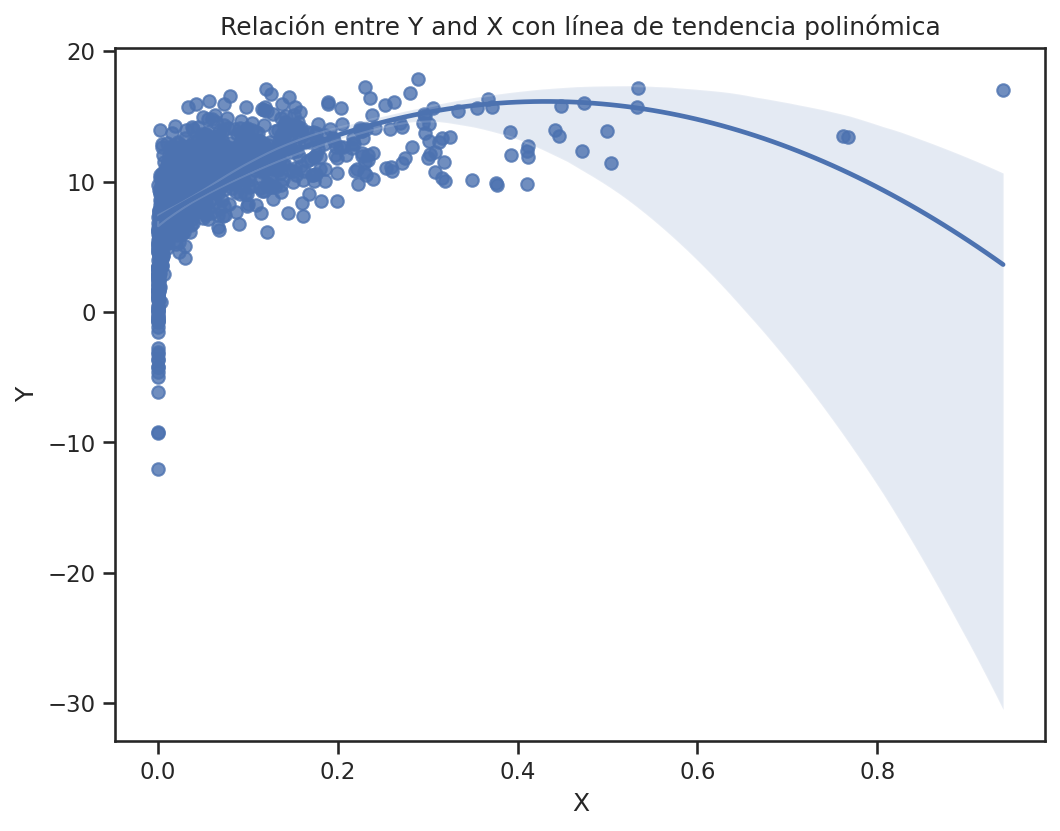

In [62]:
# Agregar una línea de tendencia polinómica de grado 2 para visualizar la curvatura
plt.figure(figsize=(8, 6))
sns.regplot(x='X', y='Y', data=df, order=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relación entre Y and X con línea de tendencia polinómica')
plt.show()


 Basado en el análisis exploratorio y la observación de la dispersión de los datos, se podría considerar una transformación logarítmica para la variable X.

* Se proponen dos transformaciones para X debido a la curvatura o no linealidad observada en la relación entre X e Y, visible en el gráfico de dispersión anterior sin interación de 'Ind':
 * Raiz
 * Logarítmica


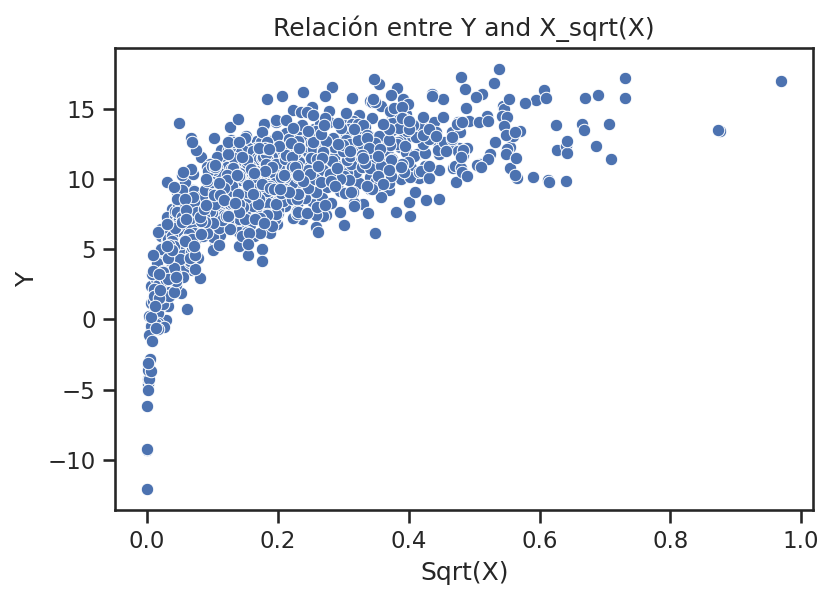

In [63]:
# @title Se Aplica una transformación de raíz cuadrada a X
# Transformación de la variable X
df['X_sqrt'] = np.sqrt(df['X'])

# Gráfico de dispersión Y vs X_sqrt
#plt.figure(figsize=(8, 6))
sns.scatterplot(x='X_sqrt', y='Y', data=df)
plt.xlabel('Sqrt(X)')
plt.ylabel('Y')
plt.title('Relación entre Y and X_sqrt(X)')
plt.show()



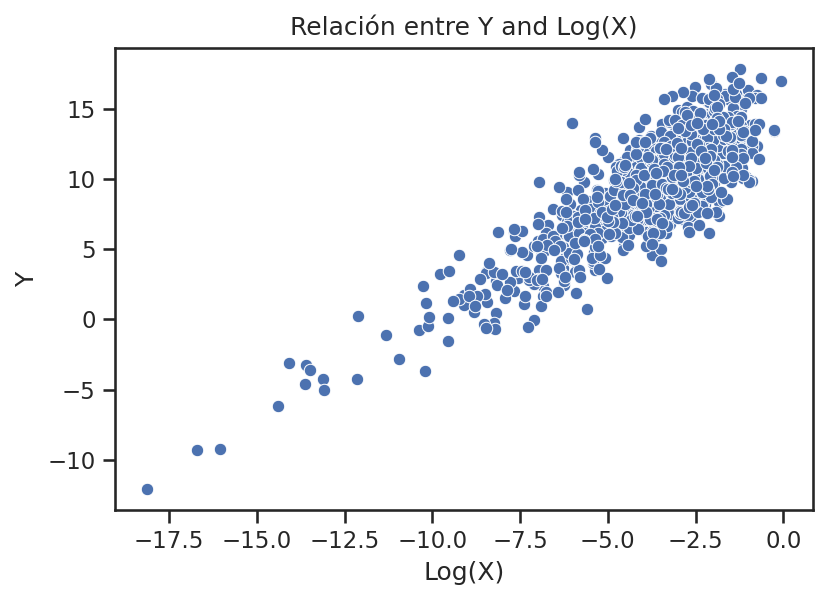

In [64]:
# @title Se Aplica una transformación de Logaritmo natural a X
# Transformación de la variable X
df['X_log'] = np.log(df['X'])
# Gráfico de dispersión Y vs X_log
'''plt.figure(figsize=(8, 6))'''
sns.scatterplot(x='X_log', y='Y', data=df)
plt.xlabel('Log(X)')
plt.ylabel('Y')
plt.title('Relación entre Y and Log(X)')
plt.show()



In [65]:
df

,Y,X,X_sqrt,X_log
0,12.189142,0.226957,0.476400,-1.482996
1,12.187456,0.088938,0.298225,-2.419815
2,11.782692,0.199069,0.446171,-1.614106
3,5.732032,0.003812,0.061741,-5.569607
4,7.026970,0.004573,0.067626,-5.387539
...,...,...,...,...
995,10.283153,0.053585,0.231484,-2.926485
996,-5.006186,0.000002,0.001436,-13.092279
997,13.845597,0.073044,0.270267,-2.616688
998,14.012956,0.085079,0.291683,-2.464177


In [66]:
import statsmodels.formula.api as sm
# Modelo de regresión lineal con interacción entre X_log e Ind
# Import the correct module for using ols
model_interaction_log = sm.ols('Y ~ X_log', data=df).fit()
print(model_interaction_log.summary())



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2726.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.29e-287
Time:                        05:20:06   Log-Likelihood:                -2123.1
No. Observations:                1000   AIC:                             4250.
Df Residuals:                     998   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1706      0.127    119.481      0.0

**Modelo RLS X_log**

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Debido a que la variable con mayor cantidad de NaN´s corresponde al 5% del conjunto de datos, se omitiran dichos datos
df = df.dropna();df

# Con 'Ind' como variable categórica y 'Y' es la variable target
X = df.drop(['Y','X','X_sqrt'], axis=1)
y = df['Y']

# Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Calcular el índice para seleccionar el 80% de los datos para entrenamiento.
X_train = df[['X']][:train_size]
Y_train = df[['Y']][:train_size]
x_test = df[['X']][train_size:]
y_test = df[['Y']][train_size:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
# Dividir los datos en entrenamiento y prueba
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
df_scaled = pd.DataFrame(scaler.transform(X_train))


X_train shape: (800, 1)
Y_train shape: (800, 1)
x_test shape: (200, 1)
y_test shape: (200, 1)


In [68]:
# @title Puntuación del modelo X_log
print(f"======================================================================")
print(f"============ X_log Evaluación el modelo sin interaciones =============")
print(f"======================================================================")

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# Crear un pipeline que incluya el transformador y el modelo de regresión lineal
pipeline = Pipeline([
    ('regression', LinearRegression())
])

# Entrenar el modelo
pipeline.fit(X_train, Y_train)

# Realizar predicciones
y_pred = pipeline.predict(x_test)
y_predTrain = pipeline.predict(X_train)


# Puntuación del modelo
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2score = r2_score(y_test, y_pred)
print(f"R2 score: {r2score}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE score: {mae}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE score: {rmse}")
mse = mean_squared_error(y_test, y_pred)
# Mean Squared Error (MSE)
print(f"MSE score: {mse}")



============ X_log Evaluación el modelo sin interaciones =============
Mean Squared Error: 3.6490739396479186
R2 score: 0.7902337945691603
MAE score: 1.5615578227145772
RMSE score: 1.910254941008639
MSE score: 3.6490739396479186


##Validación de los supuestos teoricos de los modelos##

* Esperanza de los errores es cero --- One-sample-t-test
* Normalidad en los errores --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling
* Independencia en los errores --- Test de autocorrelación de Durbin-Watson (DW test).
  * El valor del estadístico DW se utiliza para determinar si existe autocorrelación positiva o negativa.
  * Si DW está cerca de 2, entonces no hay autocorrelación.
  * Si DW está cerca de 0, entonces hay autocorrelación positiva.
  * **Si** DW está cerca de 4, entonces hay autocorrelación negativa.
* Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan



In [69]:
import statsmodels.api as sm # Import statsmodels.api
import scipy.stats as stats
import numpy as np

residualsTest  = y_test - y_pred
residualsTrain = Y_train - y_predTrain

In [70]:
#@title TEST Validación de los supuestos teoricos de los modelos

print(f"======================================================================")
print(f"=========================      TEST    ===============================")
print(f"======================================================================")

# One-sample-t-test
t_statistic, p_value = stats.ttest_1samp(residualsTest, 0)
print("One-sample t-test para la esperanza de los errores:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")
if p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

#Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling
# Prueba de Shapiro-Wilks
shapiro_statistic, shapiro_p_value = stats.shapiro(residualsTest)
print("\nPrueba de Shapiro-Wilks para la normalidad de los errores:")
print(f"Estadístico de Shapiro-Wilks: {shapiro_statistic}")
print(f"Valor p: {shapiro_p_value}")
if shapiro_p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residualsTest, 'norm')
print("\nPrueba de Kolmogorov-Smirnov para la normalidad de los errores:")
print(f"Estadístico de Kolmogorov-Smirnov: {ks_statistic}")
print(f"Valor p: {ks_p_value}")
if ks_p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Anderson-Darling
anderson_result = stats.anderson(residualsTest, dist='norm')
print("\nPrueba de Anderson-Darling para la normalidad de los errores:")
print(f"Estadístico de Anderson-Darling: {anderson_result.statistic}")
print(f"Valores críticos: {anderson_result.critical_values}")
print(f"Niveles de significancia: {anderson_result.significance_level}")

print(f"======================================================================")

# Prueba de Durbin-Watson (DW test).
DW = sm.stats.stattools.durbin_watson(residualsTest)
print(f'Prueba de Durbin-Watson para la independencia de los errores')
print(f'Estadístico DW: {DW}')

print(f"======================================================================")

print(f"Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan")
breakpoint = 0
name = 'modelo'
test = sm.stats.diagnostic.het_breuschpagan(residualsTest, sm.add_constant(x_test), robust = False)
labels = ['Estadístico LM', 'Valor p', 'Estadístico F', 'Valor p F']
print(f"\nTest de Breusch-Pagan para la homocedasticidad de los errores:")
for i in range(len(test)):
  print(f'{labels[i]}: {test[i]}')




=========================      TEST    ===============================
One-sample t-test para la esperanza de los errores:
Estadístico t: -0.520435914645861
Valor p: 0.6033383178683925
El valor p es mayor o igual a 0.05
No se rechaza la hipótesis nula de que la media de los residuos es cero.

Prueba de Shapiro-Wilks para la normalidad de los errores:
Estadístico de Shapiro-Wilks: 0.9908371600727216
Valor p: 0.23599975559926195
El valor p es mayor o igual a 0.05
No se rechaza la hipótesis nula de que la media de los residuos es cero.

Prueba de Kolmogorov-Smirnov para la normalidad de los errores:
Estadístico de Kolmogorov-Smirnov: 0.18779723357984757
Valor p: 1.1952089290749903e-06
El valor p es menor que 0.05
Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.

Prueba de Anderson-Darling para la normalidad de los errores:
Estadístico de Anderson-Darling: 0.5160826900216477
Valores críticos: [0.565 0.644 0.772 0.901 1.071]
Ni

In [71]:
#@title TRAIN Validación de los supuestos teoricos de los modelos

print(f"======================================================================")
print(f"=========================     TRAIN    ===============================")
print(f"======================================================================")

t_statistic, p_value = stats.ttest_1samp(residualsTrain, 0)
print("One-sample t-test para la esperanza de los errores:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")
if p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Shapiro-Wilks
shapiro_statistic, shapiro_p_value = stats.shapiro(residualsTrain)
print("\nPrueba de Shapiro-Wilks para la normalidad de los errores:")
print(f"Estadístico de Shapiro-Wilks: {shapiro_statistic}")
print(f"Valor p: {shapiro_p_value}")
if shapiro_p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")

print(f"======================================================================")

# Prueba de Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residualsTrain, 'norm')
print("\nPrueba de Kolmogorov-Smirnov para la normalidad de los errores:")
print(f"Estadístico de Kolmogorov-Smirnov: {ks_statistic}")
print(f"Valor p: {ks_p_value}")
if ks_p_value < 0.05:
  print("El valor p es menor que 0.05")
  print("Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.")
else:
  print("El valor p es mayor o igual a 0.05")
  print("No se rechaza la hipótesis nula de que la media de los residuos es cero.")
print(f"======================================================================")

# Prueba de Anderson-Darling
anderson_result = stats.anderson(residualsTrain, dist='norm')
print("\nPrueba de Anderson-Darling para la normalidad de los errores:")
print(f"Estadístico de Anderson-Darling: {anderson_result.statistic}")
print(f"Valores críticos: {anderson_result.critical_values}")
print(f"Niveles de significancia: {anderson_result.significance_level}")

print(f"======================================================================")

# Prueba de Durbin-Watson (DW test).
DW = sm.stats.stattools.durbin_watson(residualsTrain)
print(f'Prueba de Durbin-Watson para la independencia de los errores')
print(f'Estadístico DW: {DW}')

print(f"======================================================================")

print(f"Homocedasticidad en los errores (Varianza cte) --- Test Breusch-Pagan")
breakpoint = 0
name = 'modelo'
test = sm.stats.diagnostic.het_breuschpagan(residualsTrain, sm.add_constant(X_train), robust = False)
labels = ['Estadístico LM', 'Valor p', 'Estadístico F', 'Valor p F']
print(f"\nTest de Breusch-Pagan para la homocedasticidad de los errores:")
for i in range(len(test)):
  print(f'{labels[i]}: {test[i]}')

=========================     TRAIN    ===============================
One-sample t-test para la esperanza de los errores:
Estadístico t: -6.492075394404287e-15
Valor p: 0.9999999999999949
El valor p es mayor o igual a 0.05
No se rechaza la hipótesis nula de que la media de los residuos es cero.

Prueba de Shapiro-Wilks para la normalidad de los errores:
Estadístico de Shapiro-Wilks: 0.9988286373691148
Valor p: 0.8927104269609629
El valor p es mayor o igual a 0.05
No se rechaza la hipótesis nula de que la media de los residuos es cero.

Prueba de Kolmogorov-Smirnov para la normalidad de los errores:
Estadístico de Kolmogorov-Smirnov: 0.17012096732086923
Valor p: 1.0357880779315858e-20
El valor p es menor que 0.05
Se rechaza la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero.

Prueba de Anderson-Darling para la normalidad de los errores:
Estadístico de Anderson-Darling: 0.13294077795808334
Valores críticos: [0.573 0.653 0.783 0.913 1.087

# Conclusiones
**Transformación**

Se aplican dos transformaciones (logarítmica y raíz cuadrada) de X, los gráficos evidencian la relación entre Y y X_log se observa linealidad; por lo anterior se toma como base para realizar el modelo de regresión lineal.

**Análisis de los resultados de las pruebas para residualsTest y residualsTrain**

**One-sample t-test**

* Objetivo: Comprobar si la media de los residuos es significativamente diferente de cero
  * Interpretación:
    * Train: Test: Ambos **No** rechazan la hipótesis nula de que la media de los residuos es cero.Se puede inferir que los errores del modelo se distribuyen de forma aleatoria en torno a cero. Esto es un indicio de que el modelo está capturando adecuadamente la relación entre las variables predictoras y la variable respuesta.

**Shapiro-Wilks**

* Objetivo: Comprobar si la media de los residuos es significativamente diferente de cero
  * Interpretación:
    * Train: Test: Ambos **No** rechazan la hipótesis nula de que la media de los residuos es cero. Esto sugiere que los residuos siguen una distribución normal, es decir, no hay evidencia suficiente para afirmar que los residuales no se distribuyen normalmente.

**Kolmogorov-Smirnov**

* Objetivo: Se utiliza para comparar la distribución de los residuos con una distribución normal teórica. Esta falta de normalidad en los residuos puede indicar que el modelo no se ajusta bien a los datos o que existen otros factores no considerados en el modelo que afectan la distribución de la variable respuesta
  * Interpretación:
    * Train: Test: Ambos **rechazan** la hipótesis nula y se concluye que la media de los residuos es significativamente diferente de cero. En este caso específico, si el test de Kolmogorov-Smirnov indica que los residuos son significativamente diferentes de cero, sugiere que los residuos tienen una distribución diferente a la esperada bajo la hipótesis de normalidad, por lo tanto, esta evidencia podría indicar que el modelo lineal no se ajusta de manera óptima a los datos.



